# Quick Start

In this simple guidance, we train a restricted Boltzmann machine to approximate
the ground state of the transverse-field Ising model.

Reference:

[G. Carleo and M. Troyer, Solving the quantum manybody problem with artificial neural networks, Science 355, 602 (2017).](https://www.science.org/doi/10.1126/science.aag2302)

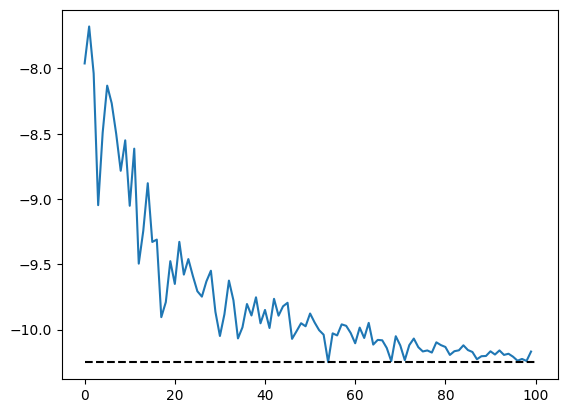

In [1]:
import quantax as qtx
import matplotlib.pyplot as plt

# Define a spin chain with 8 spins, stored as a global object in quantax
lattice = qtx.sites.Chain(L=8)

# Ising hamiltonian with transverse field h=1
H = qtx.operator.Ising(h=1)

# RBM wavefunction with 16 hidden units
model = qtx.model.RBM_Dense(features=16)

# Construct variational state
state = qtx.state.Variational(model)

# Sampler with local flip updates
sampler = qtx.sampler.LocalFlip(state, nsamples=64)

# Stochastic reconfiguration optimizer
optimizer = qtx.optimizer.SR(state, H)

energy_data = qtx.utils.DataTracer()
for i in range(100):
    samples = sampler.sweep()
    step = optimizer.get_step(samples)
    state.update(step * 1e-2)
    energy_data.append(optimizer.energy)

energy_data.plot()

E, wf = H.diagonalize()
plt.hlines(E, xmin=0, xmax=100, colors="k", linestyles="--")
plt.show()